In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
type(cancer)

sklearn.utils.Bunch

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
#print(cancer['DESCR'])

In [7]:
data = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [8]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(data)

StandardScaler()

In [13]:
scaled_data =  scaler.transform(data)

In [14]:
#PCA
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)

In [16]:
pca.fit(scaled_data)

PCA(n_components=2)

In [17]:
x_pca = pca.transform(scaled_data)

In [18]:
scaled_data.shape

(569, 30)

In [19]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

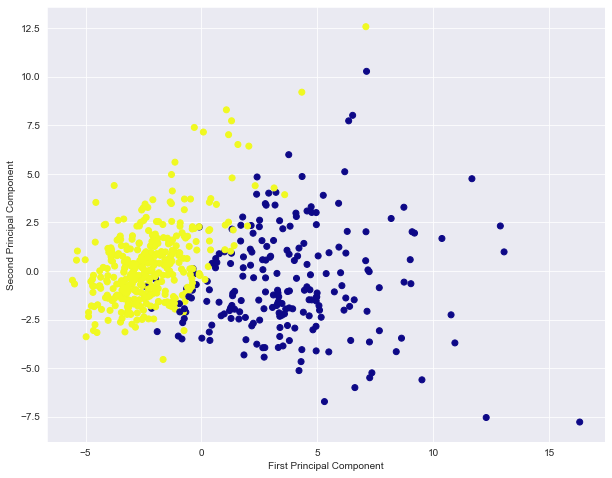

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [21]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [22]:
data_components = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

<AxesSubplot:>

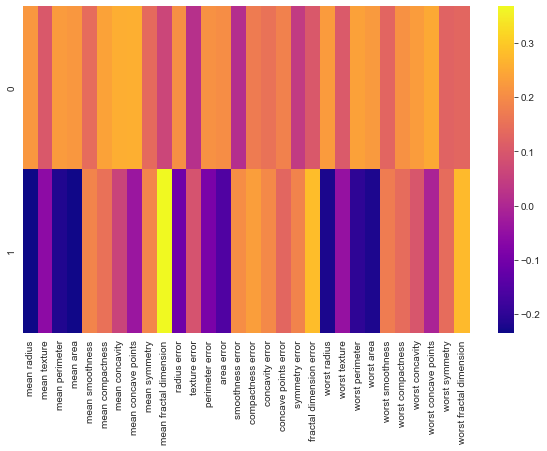

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(data_components,cmap='plasma')

In [24]:
house_data = pd.read_csv('housing.csv')
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
house_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [26]:
def converter(x):
    if x == 'NEAR OCEAN':
        return '<1H OCEAN'
    elif x == 'ISLAND':
        return '<1H OCEAN'
    else:
        return 'INLAND'

In [27]:
house_data['Safety'] = house_data['ocean_proximity'].apply(converter)

In [28]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Safety
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,INLAND
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,INLAND
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,INLAND
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,INLAND
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,INLAND


In [29]:
def strconv(x):
    if x == 'INLAND':
        return 1
    else:
        return 0

In [30]:
house_data['Is_safe'] = house_data['Safety'].apply(strconv)

In [31]:
house_data.drop('Safety', axis=1, inplace=True)

In [32]:
house_data.drop('ocean_proximity', axis=1, inplace=True)

In [33]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   Is_safe             20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [34]:
house_data.dropna(inplace=True)

In [35]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   Is_safe             20433 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
scaler.fit(house_data)

StandardScaler()

In [39]:
new_data = scaler.transform(house_data)

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=2)

In [42]:
pca.fit(new_data)

PCA(n_components=2)

In [43]:
new_pca = pca.transform(new_data)

In [44]:
new_data.shape

(20433, 10)

In [45]:
new_pca.shape

(20433, 2)

Text(0, 0.5, 'Second Principal Component')

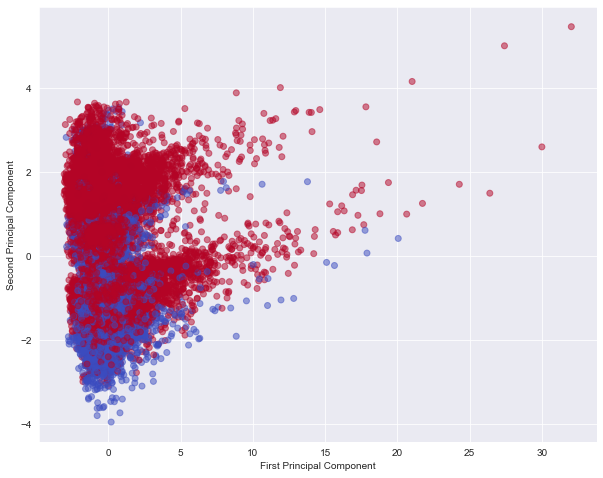

In [46]:
plt.figure(figsize=(10,8))
plt.scatter(new_pca[:,0],new_pca[:,1],cmap='coolwarm',
            c=house_data['Is_safe'],alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [47]:
pca.components_

array([[ 0.07623523, -0.07599202, -0.21637481,  0.48442479,  0.48953214,
         0.47012726,  0.49100585,  0.0558789 ,  0.04533216, -0.00155258],
       [-0.62888751,  0.67461315, -0.00723976,  0.05547801,  0.07137238,
         0.05099104,  0.07010452, -0.20766486, -0.23539241,  0.18741494]])

In [48]:
df_comp = pd.DataFrame(pca.components_,columns=house_data.columns )

In [49]:
df_comp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Is_safe
0,0.076235,-0.075992,-0.216375,0.484425,0.489532,0.470127,0.491006,0.055879,0.045332,-0.001553
1,-0.628888,0.674613,-0.007240,0.055478,0.071372,0.050991,0.070105,-0.207665,-0.235392,0.187415


<AxesSubplot:>

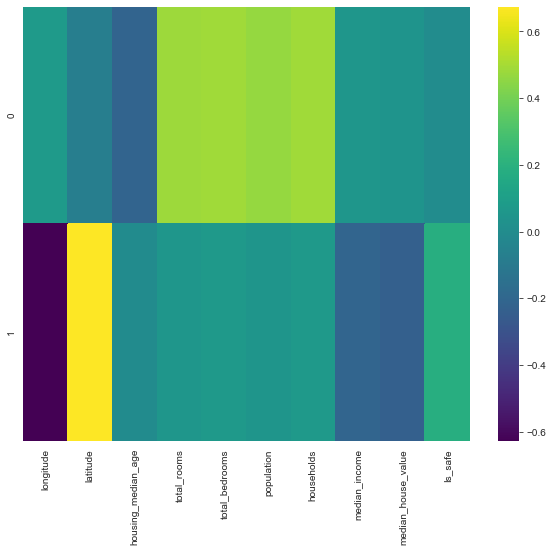

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(df_comp,cmap='viridis')